## Leaky Integrate and Fire

In [1]:
from neuroballad import LeakyIAF, AlphaSynapse, Circuit, InIStep

In [2]:
C = Circuit() #Create a circuit
N = 5
neuron_ids = C.add_cluster(N, LeakyIAF(initV=-60.,
                                       reset_potential=-67.,
                                       resting_potential=0.,
                                       threshold=-25.1,
                                       resistance=1e3,
                                       capacitance=0.07),
                           name='iaf') #Create three neurons
synapse_ids = C.add_cluster(N, AlphaSynapse(), name='alpha') #Create three synapses
C.join(list(zip(neuron_ids, synapse_ids))) #Join nodes together

C_in = []
t_start = 0.2
t_end = 0.8
_chunk = 1./len(neuron_ids)*(t_end-t_start)
_start = t_start
for n, _id in enumerate(neuron_ids):
    _end = _start + _chunk
    C_in.append(InIStep(node_id=_id, I_val=0.6, t_start=_start, t_end=_end)) #Create current input for node 0
    _start = _end

C.compile(duration=1., dt=1e-4, in_list=C_in, record=('I', 'g', 'spike_state', 'V'), graph_filename=None)

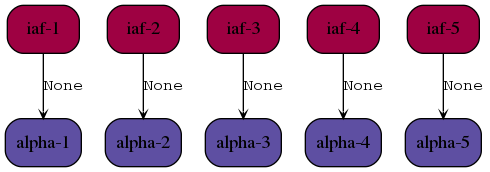

In [3]:
from IPython.display import Image
A = C.visualize_circuit(filename=None, view=True, format='png')
Image(A)

## Execution - Can only be done in shell
Add following line to the bottom of the python script in the cell above and execute the whole thing from command line"

In [4]:
# C.sim(duration=1., dt=1e-4, in_list=C_in, log='none', record=('I', 'g', 'spike_state', 'V'), graph_filename=None)

## Plot Result - once simulation is complete

In [26]:
import h5py
f = h5py.File('neuroballad_temp_model_output.h5', 'r')

KeyError: 'Unable to open object (component not found)'

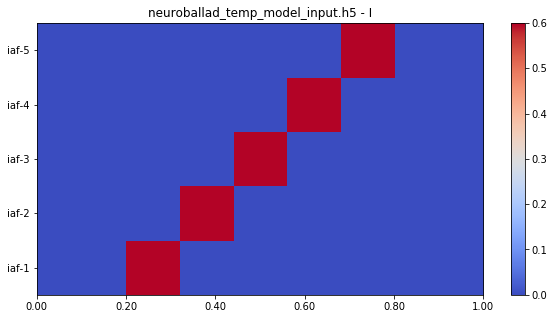

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
C.input.status = 'run'
C.output.status = 'run'
fig, axes = C.input.plot([C.encode_name(n) for n in neuron_ids], as_heatmap=True, cmap=plt.cm.coolwarm, figsize=(10,5))
fig.show()
fig, axes = C.output.plot(neuron_ids, as_heatmap=True, cmap=plt.cm.coolwarm, figsize=(10,5))
fig.show()
fig, axes = C.output.plot(synapse_ids, as_heatmap=True, cmap=plt.cm.coolwarm, figsize=(10,5))
fig.show()